# 1. Carga de datos
---

In [41]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set the path to the file you'd like to load
file_path = "./winequality-red.csv"

# Load the latest version from Kaggle
df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "uciml/red-wine-quality-cortez-et-al-2009",
    file_path,
)

print("Primeros 5 registros:\n", df.head())

Primeros 5 registros:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5

# 2. Análisis de características
---

#### Lo primero que haremos será la exploración de características con los datos del dataset en crudo para ver todos los outliers y todo en lo que se podría aplicar feature engineering

#### Exploración de la estructura del dataset

In [42]:
print("Forma del DataFrame (filas, columnas):", df.shape)
print("\nTipos de datos de cada columna:")
print(df.dtypes)
print("\nPrimeras 10 filas del DataFrame:")
print(df.head(10))
print("\n================================= Información del DataFrame (memoria, tipos de datos) ==============================")
df.info()
print("\n================================= Estadísticas Descriptivas (media, std, min, max) ==============================")
print(df.describe())

Forma del DataFrame (filas, columnas): (1599, 12)

Tipos de datos de cada columna:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Primeras 10 filas del DataFrame:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4 

### Análisis de características (EDA)
---

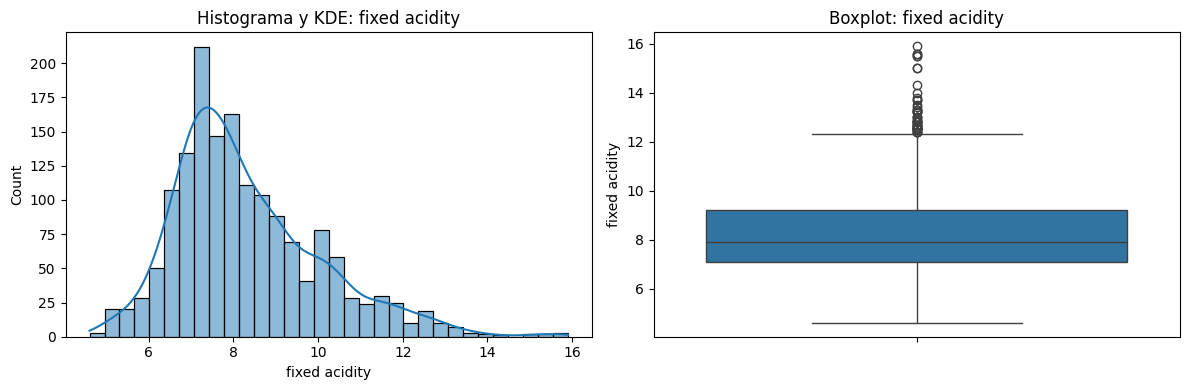

Estadísticos de fixed acidity:
count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64
Asimetría: 0.983, Curtosis: 1.132



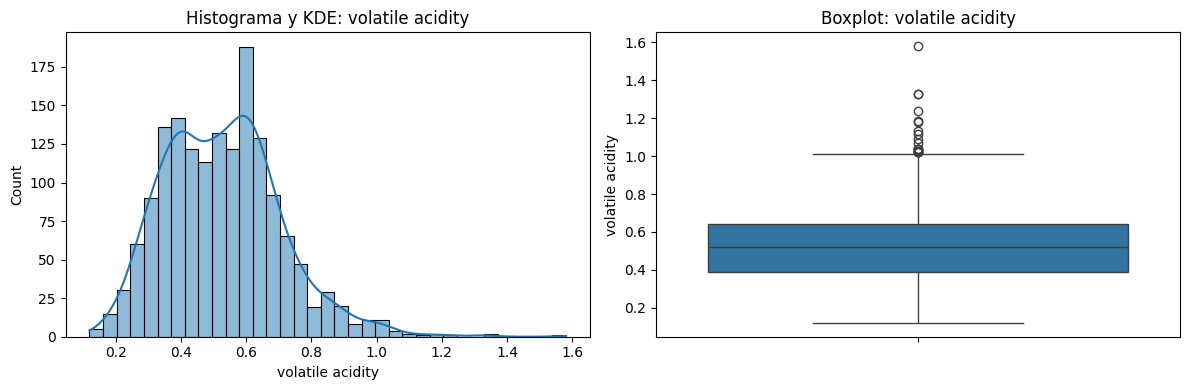

Estadísticos de volatile acidity:
count    1599.000000
mean        0.527821
std         0.179060
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile acidity, dtype: float64
Asimetría: 0.672, Curtosis: 1.226



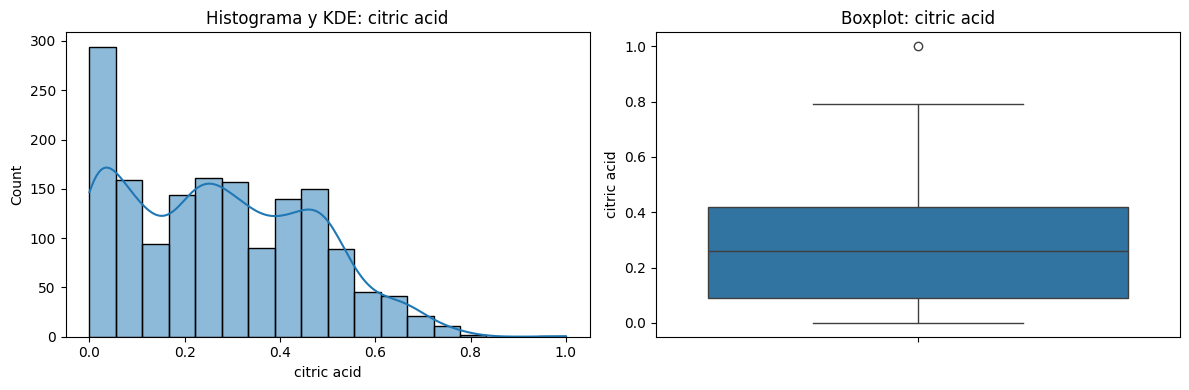

Estadísticos de citric acid:
count    1599.000000
mean        0.270976
std         0.194801
min         0.000000
25%         0.090000
50%         0.260000
75%         0.420000
max         1.000000
Name: citric acid, dtype: float64
Asimetría: 0.318, Curtosis: -0.789



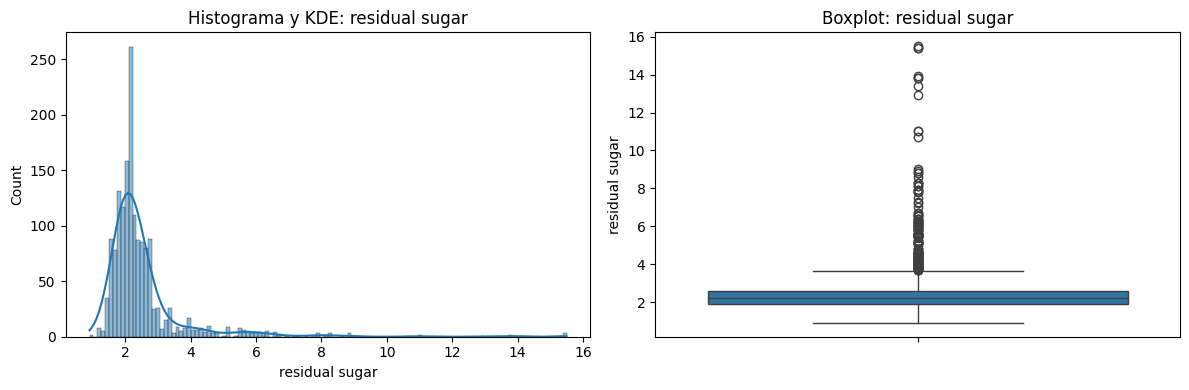

Estadísticos de residual sugar:
count    1599.000000
mean        2.538806
std         1.409928
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64
Asimetría: 4.541, Curtosis: 28.618



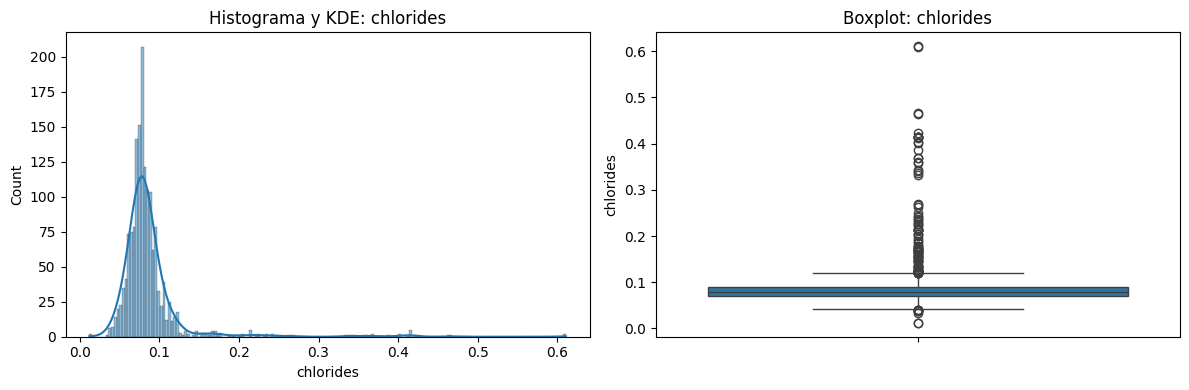

Estadísticos de chlorides:
count    1599.000000
mean        0.087467
std         0.047065
min         0.012000
25%         0.070000
50%         0.079000
75%         0.090000
max         0.611000
Name: chlorides, dtype: float64
Asimetría: 5.680, Curtosis: 41.716



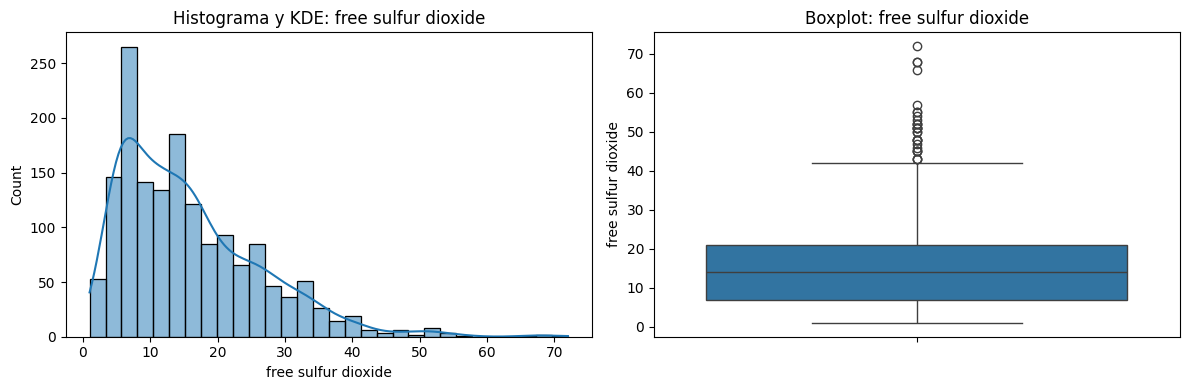

Estadísticos de free sulfur dioxide:
count    1599.000000
mean       15.874922
std        10.460157
min         1.000000
25%         7.000000
50%        14.000000
75%        21.000000
max        72.000000
Name: free sulfur dioxide, dtype: float64
Asimetría: 1.251, Curtosis: 2.024



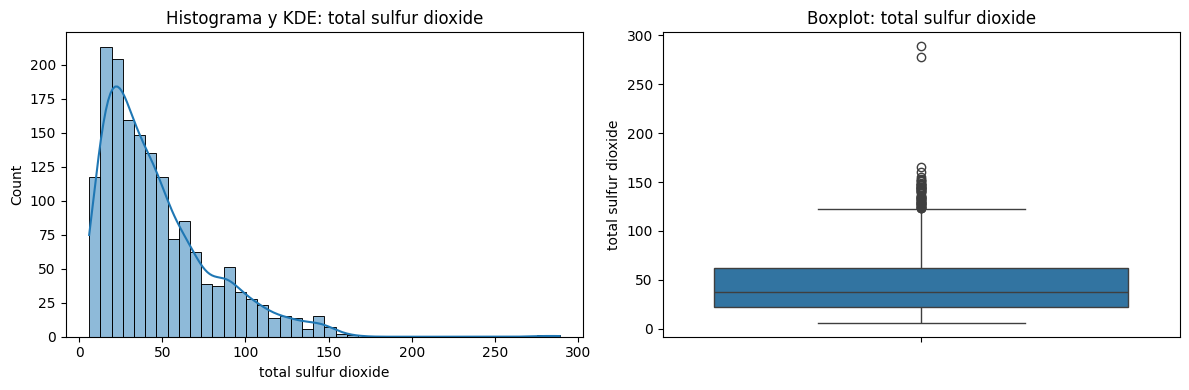

Estadísticos de total sulfur dioxide:
count    1599.000000
mean       46.467792
std        32.895324
min         6.000000
25%        22.000000
50%        38.000000
75%        62.000000
max       289.000000
Name: total sulfur dioxide, dtype: float64
Asimetría: 1.516, Curtosis: 3.810



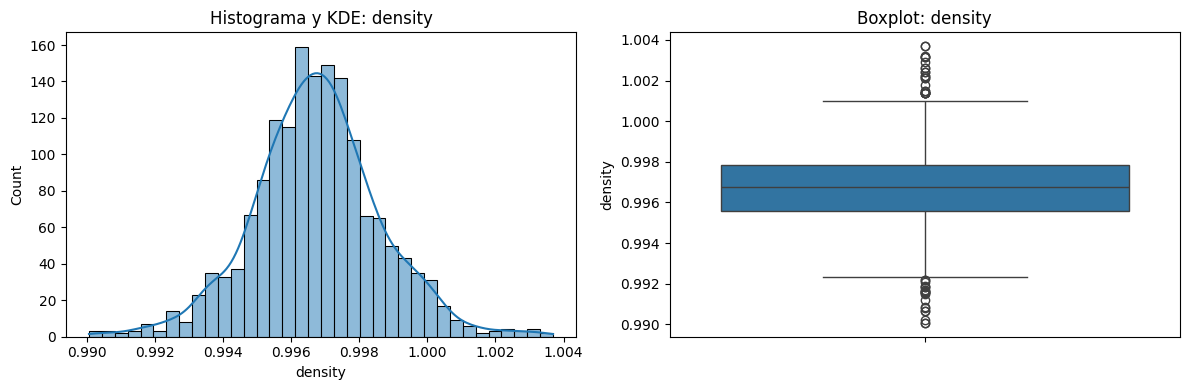

Estadísticos de density:
count    1599.000000
mean        0.996747
std         0.001887
min         0.990070
25%         0.995600
50%         0.996750
75%         0.997835
max         1.003690
Name: density, dtype: float64
Asimetría: 0.071, Curtosis: 0.934



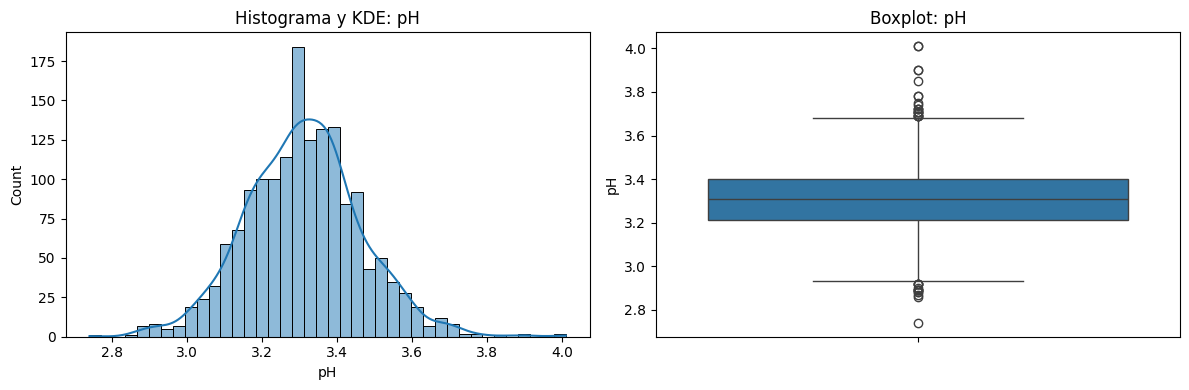

Estadísticos de pH:
count    1599.000000
mean        3.311113
std         0.154386
min         2.740000
25%         3.210000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64
Asimetría: 0.194, Curtosis: 0.807



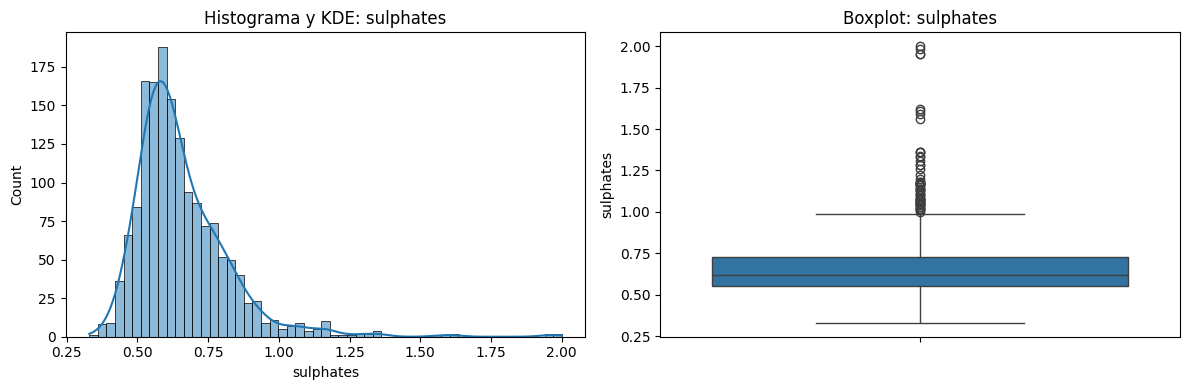

Estadísticos de sulphates:
count    1599.000000
mean        0.658149
std         0.169507
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64
Asimetría: 2.429, Curtosis: 11.720



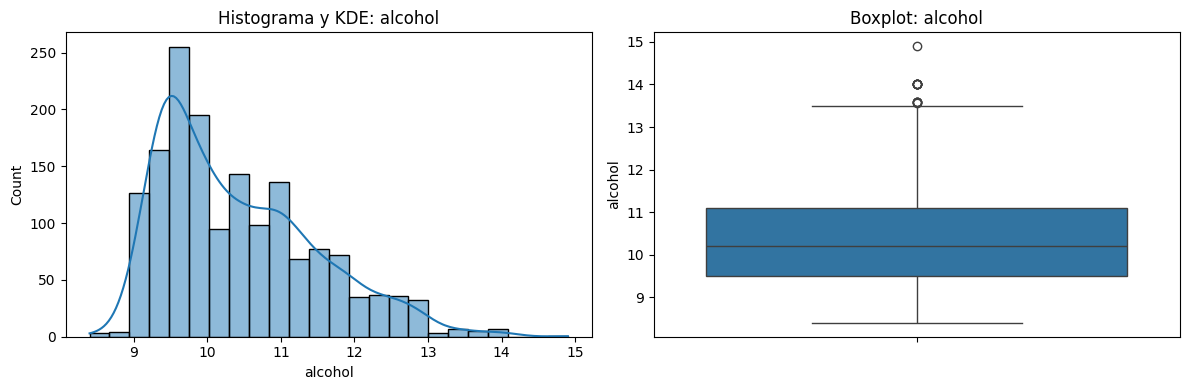

Estadísticos de alcohol:
count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64
Asimetría: 0.861, Curtosis: 0.200



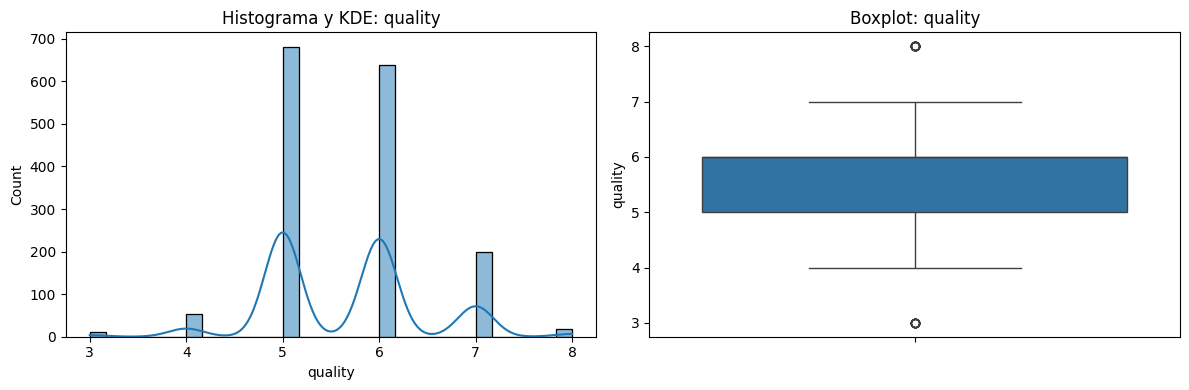

Estadísticos de quality:
count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64
Asimetría: 0.218, Curtosis: 0.297



In [43]:
num_cols = df.select_dtypes(include=[np.number]).columns

for col in num_cols:
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[col], kde=True, ax=axs[0])
    axs[0].set_title(f"Histograma y KDE: {col}")
    sns.boxplot(y=df[col], ax=axs[1])
    axs[1].set_title(f"Boxplot: {col}")
    plt.tight_layout()
    plt.show()
    print(f"Estadísticos de {col}:")
    print(df[col].describe())
    print(f"Asimetría: {df[col].skew():.3f}, Curtosis: {df[col].kurtosis():.3f}\n")


# Identificación de outliers usando el criterio de rango intercuartílico (IQR)


### Eliminación de datos duplicados
---
¿Por qué es el primer paso?
Eliminar los datos duplicados al inicio del análisis es importante porque los registros repetidos pueden distorsionar las estadísticas descriptivas, los gráficos y las correlaciones, haciendo que los resultados no reflejen la realidad del fenómeno estudiado. Además, los duplicados pueden causar que el modelo aprenda patrones falsos o sobreentrene, afectando la capacidad de generalización. Por eso, limpiar duplicados antes de explorar y analizar asegura que todo el análisis posterior se base en información verídica y representativa del dataset.

In [44]:
print("Duplicados totales:", df.duplicated().sum())
if df.duplicated().sum() > 0:
    print(df[df.duplicated()])
df = df.drop_duplicates()
print("Duplicados totales después de eliminar:", df.duplicated().sum())




Duplicados totales: 240
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30      0.076   

   

#### División del Dataset

Se divide antes de calcular outliers, para no contaminar los samplings separados con información cruzada.



In [45]:

df['target'] = (df['quality'] >= 7).astype(int) # Genera columna target binaria para reemplazar quality, 1 si quality >=7, 0 en otro caso

# 2) Barajamos el dataset completo para evitar bias
df = df.sample(frac=1, random_state=42).reset_index(drop=True)


# 4) Estratificar manualmente
for cls, subset in df.groupby('target'):
    n = len(subset)
    idx = np.random.permutation(n)
    
    n_train = int(0.7 * n)
    n_val   = int(0.15 * n)
    n_test  = n - n_train - n_val
    
    train_idx = idx[:n_train]
    val_idx   = idx[n_train:n_train + n_val]
    test_idx  = idx[n_train + n_val:]
    
    dftrain = pd.concat([dftrain, subset.iloc[train_idx]])
    dfval   = pd.concat([dfval,   subset.iloc[val_idx]])
    dftest  = pd.concat([dftest,  subset.iloc[test_idx]])

# 5) Reordenar
dftrain = dftrain.sample(frac=1, random_state=42).reset_index(drop=True)
dfval   = dfval.sample(frac=1, random_state=42).reset_index(drop=True)
dftest  = dftest.sample(frac=1, random_state=42).reset_index(drop=True)

print("Train:", dftrain['target'].value_counts(normalize=True))
print("Val  :", dfval['target'].value_counts(normalize=True))
print("Test :", dftest['target'].value_counts(normalize=True))

Train: target
0    0.865263
1    0.134737
Name: proportion, dtype: float64
Val  : target
0    0.866995
1    0.133005
Name: proportion, dtype: float64
Test : target
0    0.859223
1    0.140777
Name: proportion, dtype: float64


### Verificamos outliers para training
---

In [46]:
print("=== Detección de outliers (criterio 1.5*IQR) ===")
outlier_report = {}
for col in num_cols:
    Q1 = dftrain[col].quantile(0.25)
    Q3 = dftrain[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = dftrain[(dftrain[col] < lower) | (dftrain[col] > upper)]
    n_outliers = outliers.shape[0]
    outlier_report[col] = n_outliers
    print(f"{col}: {n_outliers} outliers")


=== Detección de outliers (criterio 1.5*IQR) ===
fixed acidity: 87 outliers
volatile acidity: 37 outliers
citric acid: 2 outliers
residual sugar: 251 outliers
chlorides: 183 outliers
free sulfur dioxide: 56 outliers
total sulfur dioxide: 92 outliers
density: 76 outliers
pH: 57 outliers
sulphates: 116 outliers
alcohol: 26 outliers
quality: 62 outliers


#### Tratamiento de outliers
---

#### Se necesita tratar los outliers antes de ver la correlación para poder elegir certeramente cuales características serán más valiosas para realizar la regresión 

Por lo tanto para tratarlos se procederá con los siguientes métodos, a elegir según sea conveniente 
 - Regla de rangos intercuartílicos
 - Winzorización 
 - z score
  

Analisis de la decisión de método de limpieza de outliers para cada respectivo feature:
 

 Nota: Generar aquí tabla explicativa de cuando usar cada metodo de limpieza

In [47]:
# === Calcular límites por variable en TRAIN ===
def calcular_limites(df):
    limites = {}

    # IQR para algunas columnas
    for col in ['fixed acidity', 'volatile acidity', 'pH', 'alcohol']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limites[col] = ('iqr', Q1 - 1.5*IQR, Q3 + 1.5*IQR)

    # Z-score para density
    mu = df['density'].mean()
    std = df['density'].std()
    limites['density'] = ('zscore', mu - 3*std, mu + 3*std)

    # Winsorización para colas pesadas
    for col in ['residual sugar', 'chlorides', 'sulphates']:
        low = df[col].quantile(0.01)
        high = df[col].quantile(0.99)
        limites[col] = ('winsor', low, high)

    return limites

# === Aplicar límites en cualquier dataset ===
def aplicar_limites(df, limites):
    df2 = df.copy()
    reporte = []
    for col, (tipo, low, high) in limites.items():
        original = df2[col].copy()
        df2[col] = df2[col].clip(lower=low, upper=high)
        n_mod = (df2[col] != original).sum()
        reporte.append({
            'col': col,
            'tipo': tipo,
            'lim_inf': low,
            'lim_sup': high,
            'valores_modificados': int(n_mod),
            'pct_modificados': 100 * n_mod / len(df2)
        })
    return df2, pd.DataFrame(reporte)

#### Generamos los datasets divididos y los limpiamos 
---


In [48]:
# Calcular límites solo con train
limites = calcular_limites(dftrain)

#Los datasets limpios serán dftrain_clean, dfval_clean, dftest_clean
# Aplicar límites a cada conjunto
dftrain_clean, rep_train = aplicar_limites(dftrain, limites)
dfval_clean,   rep_val   = aplicar_limites(dfval,   limites)
dftest_clean,  rep_test  = aplicar_limites(dftest,  limites)

print("Reporte TRAIN")
print(rep_train)
print("Reporte VAL")
print(rep_val)
print("Reporte TEST")
print(rep_test)

Reporte TRAIN
                col    tipo   lim_inf    lim_sup  valores_modificados  \
0     fixed acidity     iqr  3.950000  12.350000                   87   
1  volatile acidity     iqr  0.015000   1.015000                   37   
2                pH     iqr  2.925000   3.685000                   57   
3           alcohol     iqr  7.100000  13.500000                   26   
4           density  zscore  0.991053   1.002352                   29   
5    residual sugar  winsor  1.300000   8.300000                   41   
6         chlorides  winsor  0.041490   0.368510                   58   
7         sulphates  winsor  0.430000   1.280000                   53   

   pct_modificados  
0         3.052632  
1         1.298246  
2         2.000000  
3         0.912281  
4         1.017544  
5         1.438596  
6         2.035088  
7         1.859649  
Reporte VAL
                col    tipo   lim_inf    lim_sup  valores_modificados  \
0     fixed acidity     iqr  3.950000  12.350000      

#### Se normaliza el dataset 
      Con el objetivo de eliminar hacer nuestro modelo más eficiente y limpio
---

### Normalización

In [49]:
# Normalización de los datos numéricos con Z-score
df_norm = df.copy()
num_cols = df_norm.select_dtypes(include=[np.number]).columns

for col in num_cols:
    mean = df_norm[col].mean()
    std = df_norm[col].std()
    df_norm[col] = (df_norm[col] - mean) / std

print("---Columnas originales---\n", df.head())
print("\n---Columnas normalizadas---\n", df_norm.head())


# Seleccionar solo columnas numéricas para normalizar (excluyendo 'quality' y 'target')
num_cols = [c for c in dftrain_clean.select_dtypes(include=[np.number]).columns 
            if c not in ['quality','target']]

# Calcular media y std SOLO en TRAIN
mean = dftrain_clean[num_cols].mean()
std = dftrain_clean[num_cols].std(ddof=0)

# Se normaliza para train, val y test
dftrain_scaled = dftrain_clean.copy()
dfval_scaled   = dfval_clean.copy()
dftest_scaled  = dftest_clean.copy()

dftrain_scaled[num_cols] = (dftrain_clean[num_cols] - mean) / std
dfval_scaled[num_cols]   = (dfval_clean[num_cols]   - mean) / std
dftest_scaled[num_cols]  = (dftest_clean[num_cols]  - mean) / std

---Columnas originales---
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.7             0.620         0.04             3.8      0.084   
1            8.2             0.635         0.10             2.1      0.073   
2            8.4             0.370         0.43             2.3      0.063   
3            9.9             0.490         0.58             3.5      0.094   
4            6.3             1.020         0.00             2.0      0.083   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 25.0                  45.0  0.99780  3.34       0.53   
1                 25.0                  60.0  0.99638  3.29       0.75   
2                 12.0                  19.0  0.99550  3.17       0.81   
3                  9.0                  43.0  1.00040  3.29       0.58   
4                 17.0                  24.0  0.99437  3.59       0.55   

   alcohol  quality  target  
0      9.5        5       0  

Se imprime la matriz de correlación con el dataframe limpio

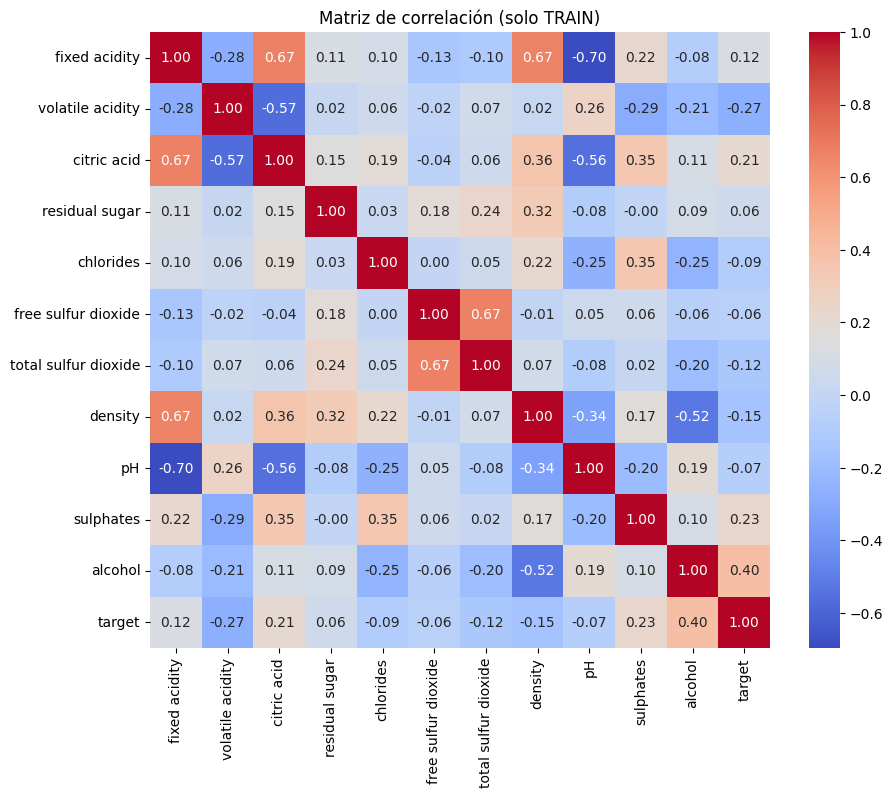

In [50]:
# Excluimos 'quality' y 'target' para no mezclar
features = [c for c in dftrain_scaled.columns if c not in ['quality','target']]

corr = dftrain_scaled[features + ['target']].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación (solo TRAIN)")
plt.show()

## Análisis de características(EDA) con los datos normalizados
---

In [ ]:
#--- Análisis de características (EDA) con los datos normalizados ---
num_cols_norm = df_norm.select_dtypes(include=[np.number]).columns

for col in num_cols_norm:
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df_norm[col], kde=True, ax=axs[0])
    axs[0].set_title(f"Histograma y KDE (normalizado): {col}")
    sns.boxplot(y=df_norm[col], ax=axs[1])
    axs[1].set_title(f"Boxplot (normalizado): {col}")
    plt.tight_layout()
    plt.show()
    print(f"Estadísticos normalizados de {col}:")
    print(df_norm[col].describe())
    print(f"Asimetría: {df_norm[col].skew():.3f}, Curtosis: {df_norm[col].kurtosis():.3f}\n")

# Matriz de correlación y mapa de calor (normalizado)
corr_norm = df_norm[num_cols_norm].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_norm, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación (normalizada)")
plt.show()

# Identificación de outliers usando el criterio de rango intercuartílico (IQR) en datos normalizados
print("=== Detección de outliers (criterio 1.5*IQR, datos normalizados) ===")
outlier_report_norm = {}
for col in num_cols_norm:
    Q1 = df_norm[col].quantile(0.25)
    Q3 = df_norm[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_norm[(df_norm[col] < lower) | (df_norm[col] > upper)]
    n_outliers = outliers.shape[0]
    outlier_report_norm[col] = n_outliers
    print(f"{col}: {n_outliers} outliers")

print("\n=== Outliers (datos normalizados) ===")
for col, n_outliers in outlier_report_norm.items():
    if n_outliers > 0:
        print(f"- {col}: Se detectaron {n_outliers} valores atípicos.")
    else:
        print(f"- {col}: No se detectaron valores atípicos significativos.")